In [80]:
import matplotlib.pyplot as plt
from mxnet import nd, autograd, gluon
import d2l

In [81]:
def synthetic_data(w, b, num_examples):
    X = nd.random.normal(scale=1, shape=(num_examples, len(w)))
    y = nd.dot(X, w) + b
    y += nd.random.normal(scale=0.01, shape=y.shape)

    return X, y

In [82]:
def get_dataloader(arrays, batch_size):
    dataset = gluon.data.ArrayDataset(*arrays)
    return gluon.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)

In [120]:
def get_weights(num_inputs):
    w = nd.random.normal(scale=0.1, shape=(num_inputs, 1))
    b = nd.zeros(1)
    w.attach_grad()
    b.attach_grad()
    return w, b

In [121]:
def l2_regularizer(w):
    return (w**2).sum()/2

In [122]:
def eval_loss(net, data_iter, loss):
    acc = 0
    size = 0
    for X, y in data_iter:
        result = net(X)
        l = loss(result, y)
        acc += l.sum().asscalar()
        size += y.size
    return acc / size

In [123]:
def net(X):
    return nd.dot(X, w) + b

In [124]:
num_test, num_train, num_inputs = 100, 20, 200
true_w = nd.ones(shape=(num_inputs, 1)) * 0.01
true_b = 0.05

batch_size = 1
num_epochs = 100

train_X, train_y = synthetic_data(true_w, true_b, num_train)
test_X, test_y = synthetic_data(true_w, true_b, num_test)
train_iter = get_dataloader([train_X, train_y], batch_size)
test_iter = get_dataloader([test_X, test_y], 10)

In [125]:
w, b = get_weights(num_inputs)

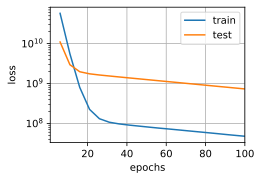

In [128]:
animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                        xlim=[1, num_epochs], legend=['train', 'test'])

epochs = num_epochs
lr = 0.001
loss = gluon.loss.L2Loss()
# for X, y in train_iter:
#     l = loss(net(X), y)
#     print(type(l))
#     break
    
lambd = 4

print(w.sum())
for epoch in range(1, epochs+1):
    for X, y in train_iter:
        with autograd.record():
            l = loss(net(X), y) + lambd * l2_regularizer(w)
        l.backward()
        w[:] = w - (lr / batch_size) * w.grad
        b[:] = b - (lr / batch_size) * b.grad
#     print(eval_loss(net, train_iter, loss))
    if epoch % 5 == 0:
        animator.add(epoch+1, (eval_loss(net, train_iter, loss),
                                   eval_loss(net, test_iter, loss)))
#         print("L2 norm of weights: %f" % (w.norm().asscalar()))